In [2]:
import numpy as np
import matplotlib.pyplot as plt
from yambopy import *

#Change me with your own path
WORK_PATH='./data-tests/LiF/'
QE_PATH='./data-tests/LiF/'
YAMBO_PATH = f'./data-tests/LiF/Optics'
ry2ev=13.505703975

# Istance of useful classes
#savedb_k = YamboSaveDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/10x10x10/SAVE')
lat_k = YamboLatticeDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/10x10x10/SAVE/')
#savedb_q = YamboSaveDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/5x5x5/SAVE')
lat_q = YamboLatticeDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/5x5x5/SAVE/')
nnkp_kgrid = NNKP_Grids(f'{QE_PATH}/nscf-wannier-10x10x10//LiF', lat_k, yambo_grid=True)
nnkp_qgrid = NNKP_Grids(f'{QE_PATH}/nscf-wannier-5x5x5//LiF', lat_q, yambo_grid=True)
nnkp_kgrid.get_kmq_grid(nnkp_qgrid)
nnkp_kgrid.get_qpb_grid(nnkp_qgrid)
nnkp_qgrid.get_qpb_grid(nnkp_qgrid)
nnkp_kgrid.get_kpbover2_grid(nnkp_qgrid)
nnkp_kgrid.get_kmqmbover2_grid(nnkp_qgrid)


Time for NNKP.__init__() : 0.04932236671447754
Time for NNKP.__init__() : 0.007372856140136719


In [81]:
import numpy as np
import matplotlib.pyplot as plt

def drop_axis(points, axis_index):
    return np.delete(points, axis_index, axis=1)

def check_kgridoperations_2d(nnkp_kgrid, nnkp_qgrid, ik, iq, fixed_axis='z', operation='kmqmbover2', fixed_value=0.0):
    k_grid = nnkp_kgrid.k
    q_grid = nnkp_qgrid.k

    transformed = []
    for ib in range(8):
        if (operation == 'kmqmbover2'):
            new_point = nnkp_kgrid.k[nnkp_kgrid.kmqmbover2_grid_table[ik, iq, ib, 1]]
        elif(operation=='kmq'):
            new_point = nnkp_kgrid.k[nnkp_kgrid.kmq_grid_table[ik, iq, 1]]
        elif(operation=='kpbover2'):
            new_point = nnkp_kgrid.k[nnkp_kgrid.kpbover2_grid_table[ik, ib, 1]]  
        transformed.append(new_point)
    transformed = np.array(transformed)

    k_point = k_grid[ik]
    #if you call operations that do not use q-point, set iq=0 (gamma)
    q_point = q_grid[iq]

    # Select 2D plane
    axis_index = {'x': 0, 'y': 1, 'z': 2}[fixed_axis]

    def filter_plane(points):
        return points[np.isclose(points[:, axis_index], fixed_value, atol=1e-2)]

    k_plane = filter_plane(np.array([k_point-q_point]))
    transformed_plane = filter_plane(transformed)
    all_plane = filter_plane(k_grid)

    k_set = set(map(tuple, np.round(k_plane, 6)))
    transformed_set = set(map(tuple, np.round(transformed_plane, 6)))
    all_set = set(map(tuple, np.round(all_plane, 6)))
    black_set = all_set - k_set - transformed_set
    print('You started with k-points:', np.array(list(k_set)))
    print('You ended up with points:\n', np.array(list(transformed_set)))

    fig, ax = plt.subplots(figsize=(8, 8))

    def scatter_set(ax, s, color, label):
        arr = np.array(list(s))
        if len(arr) > 0:
            arr2d = drop_axis(arr, axis_index)
            ax.scatter(arr2d[:, 0], arr2d[:, 1], c=color, label=label, alpha=0.6)

    scatter_set(ax, black_set, 'black', 'Other Points')
    scatter_set(ax, k_set, 'blue', 'Selected k-point')
    scatter_set(ax, transformed_set, 'red', f'neighbors ({operation})')

    ax.set_xlabel('Axis 1')
    ax.set_ylabel('Axis 2')
    ax.set_title(f'2D slice at {fixed_axis} = {fixed_value} for ik={ik}, iq={iq}')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
            fancybox=True, shadow=True, ncol=5)
    plt.axis('equal')
    plt.show()

In [83]:
nnkp_kgrid.k[-1]

array([-0.3,  0.2,  0.5])

You started with k-points: []
You ended up with points:
 []


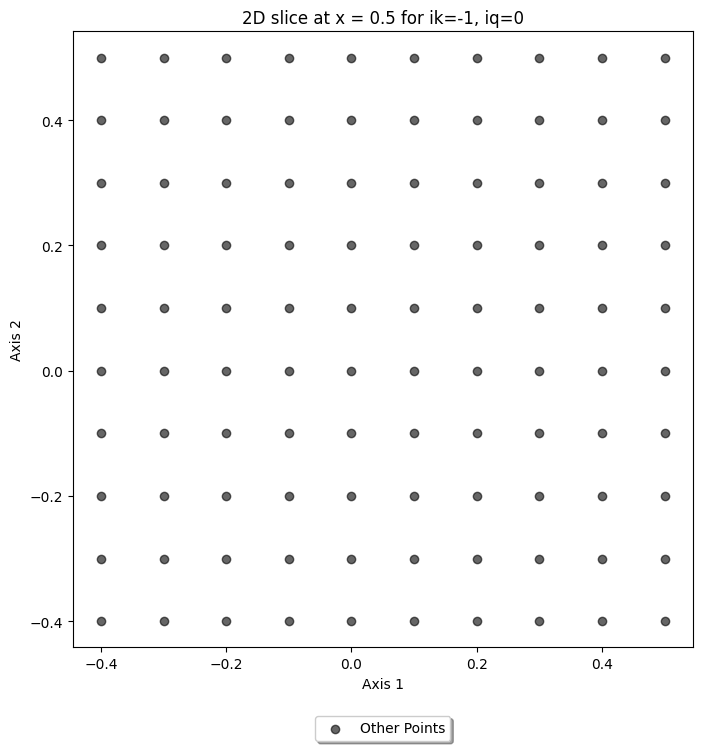

You started with k-points: []
You ended up with points:
 []


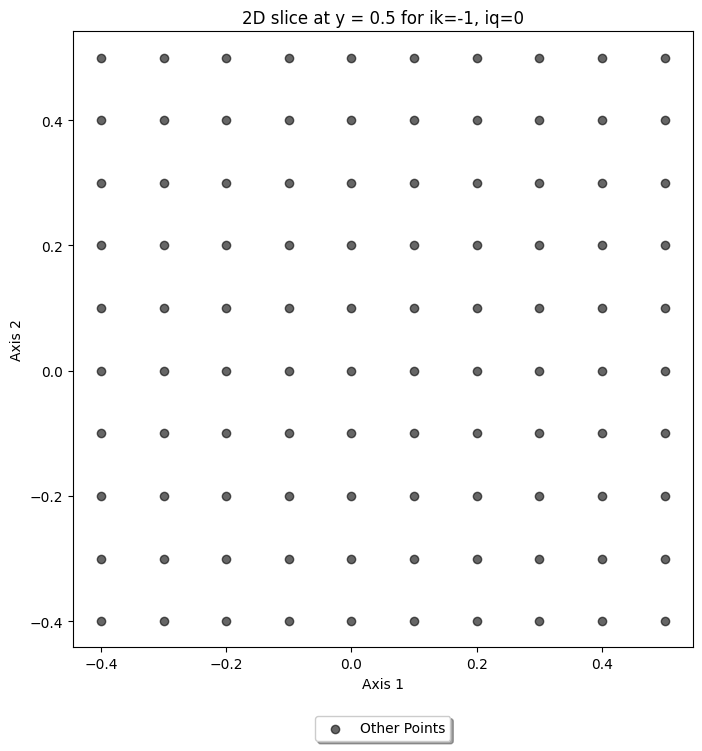

You started with k-points: [[-0.3  0.2  0.5]]
You ended up with points:
 [[-0.3  0.1  0.5]
 [-0.3  0.3  0.5]
 [-0.2  0.2  0.5]
 [-0.4  0.2  0.5]]


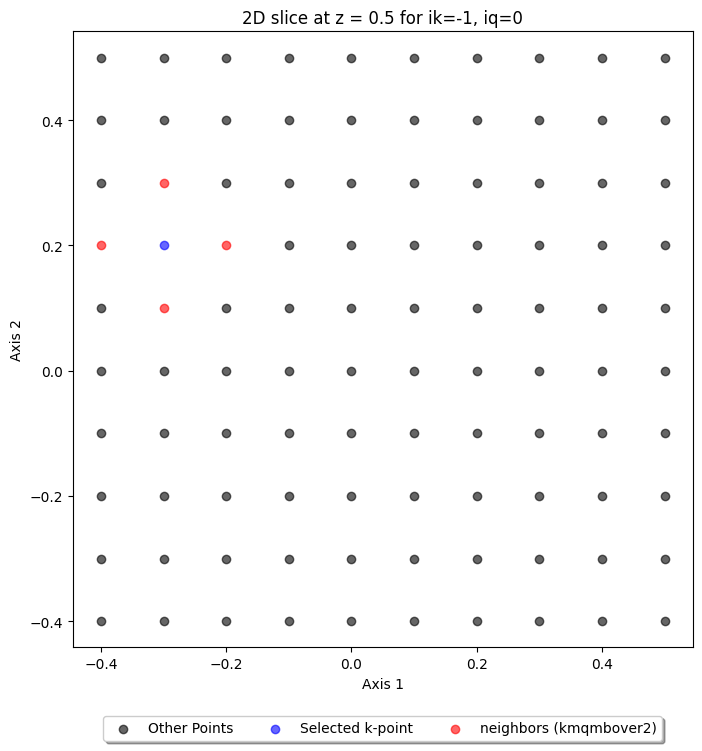

In [84]:
# Example usage (pass nnkp_kgrid and nnkp_qgrid from your environment)
for axis in ['x', 'y', 'z']:
    check_kgridoperations_2d(nnkp_kgrid, nnkp_qgrid, ik=-1, iq=0, fixed_axis=axis, fixed_value=0.5,operation='kmqmbover2')

In [6]:
nnkp_kgrid.k[-1]

array([-0.3,  0.2,  0.5])

In [68]:
set1 = {}

In [69]:
print(set1)

{}


In [66]:
a

NameError: name 'a' is not defined